# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_010302D_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [16]:
df = pd.read_csv('sales.csv')

print("Первые 15 строк данных:")
print(df.head(15))
print("\nПоследние 15 строк данных:")
print(df.tail(15))

Первые 15 строк данных:
    Rank                         Name Platform    Year         Genre  \
0      1                   Wii Sports      Wii  2006.0        Sports   
1      2            Super Mario Bros.      NES  1985.0      Platform   
2      3               Mario Kart Wii      Wii  2008.0        Racing   
3      4            Wii Sports Resort      Wii  2009.0        Sports   
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5      6                       Tetris       GB  1989.0        Puzzle   
6      7        New Super Mario Bros.       DS  2006.0      Platform   
7      8                     Wii Play      Wii  2006.0          Misc   
8      9    New Super Mario Bros. Wii      Wii  2009.0      Platform   
9     10                    Duck Hunt      NES  1984.0       Shooter   
10    11                   Nintendogs       DS  2005.0    Simulation   
11    12                Mario Kart DS       DS  2005.0        Racing   
12    13  Pokemon Gold/Pokemon Silver   

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [17]:
print("Форма данных:", df.shape)

# Определение общего числа объектов в датасете
total_objects = df.shape[0]
print("Общее количество объектов в датасете:", total_objects)

Форма данных: (16598, 11)
Общее количество объектов в датасете: 16598


Ответ: <span style="color:red">#впишите сюда</span>

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Ответ: <span style="color:red">#впишите сюда</span>

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [19]:
global_sales_stats = df['Global_Sales'].describe()

max_global_sales = global_sales_stats['max']
mean_global_sales = global_sales_stats['mean']

print("Максимальный объем продаж во всем мире:", max_global_sales)
print("Средний объем продаж во всем мире:", mean_global_sales)


Максимальный объем продаж во всем мире: 82.74
Средний объем продаж во всем мире: 0.5374406555006628


Ответ: <span style="color:red">#впишите сюда</span>

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [20]:
missing_values = df.isnull().sum()
print("Количество пропусков по каждому признаку:")
print(missing_values)

# Заполнение пропущенных значений в числовых признаках медианным значением
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Удаление строк с пропущенными значениями в остальных признаках
df = df.dropna()

# Проверка, что все пропуски заполнены или удалены
print("\nКоличество пропусков после обработки:")
print(df.isnull().sum())

Количество пропусков по каждому признаку:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Количество пропусков после обработки:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

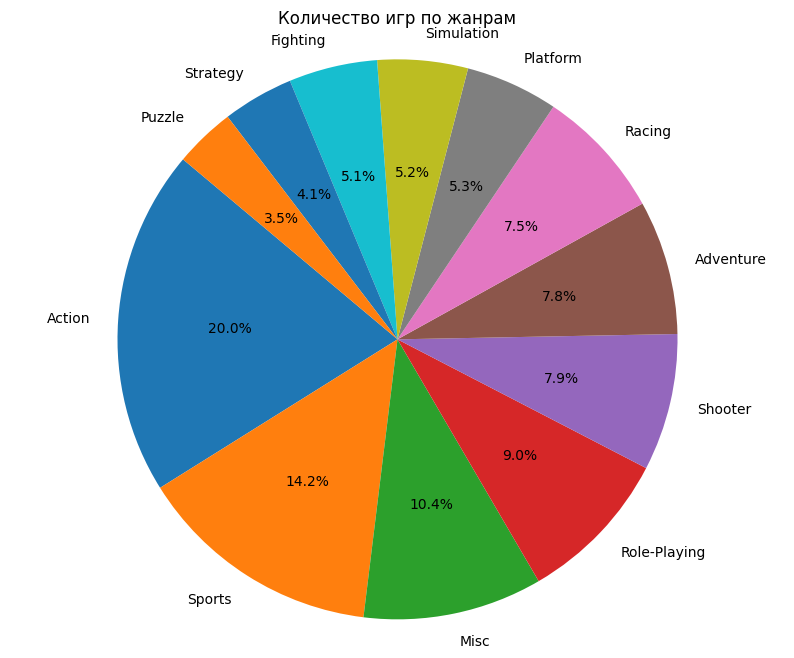

Самый популярный жанр: Action


In [21]:
# Подсчет количества игр для каждого жанра
genre_counts = df['Genre'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Количество игр по жанрам')
plt.axis('equal')
plt.show()

most_common_genre = genre_counts.idxmax()
print("Самый популярный жанр:", most_common_genre)

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

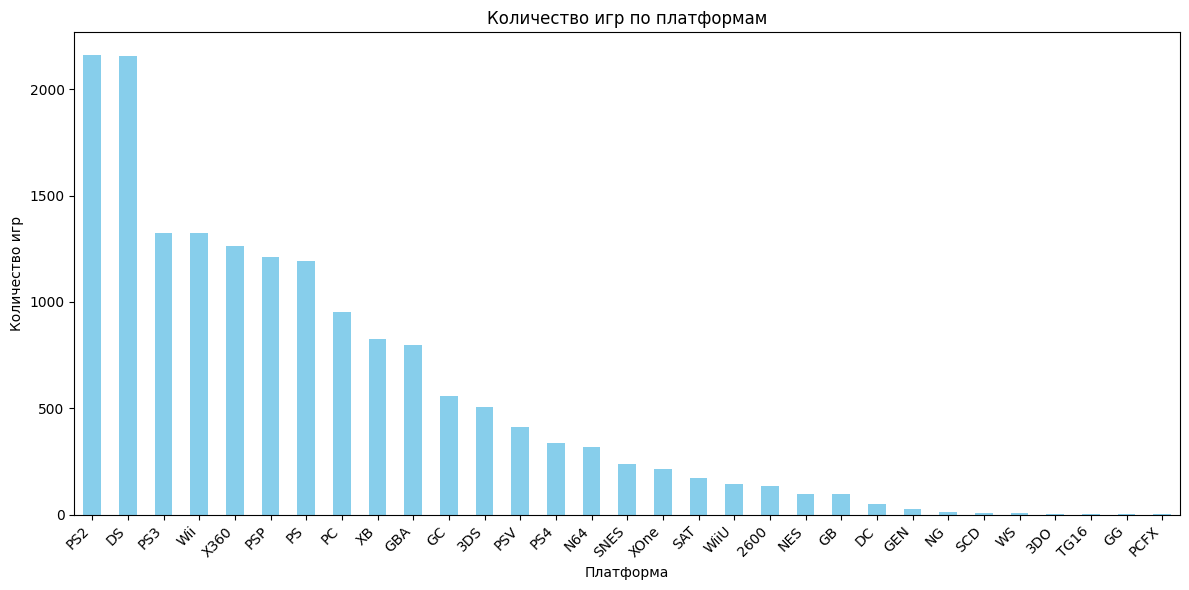

Наибольшее количество игр выпущено на платформу: PS2


In [22]:
platform_counts = df['Platform'].value_counts()

# Сортировка по убыванию количества игр
platform_counts = platform_counts.sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Количество игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси x
plt.tight_layout()
plt.show()

# Нахождение платформы с наибольшим количеством игр
most_common_platform = platform_counts.idxmax()
print("Наибольшее количество игр выпущено на платформу:", most_common_platform)


Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

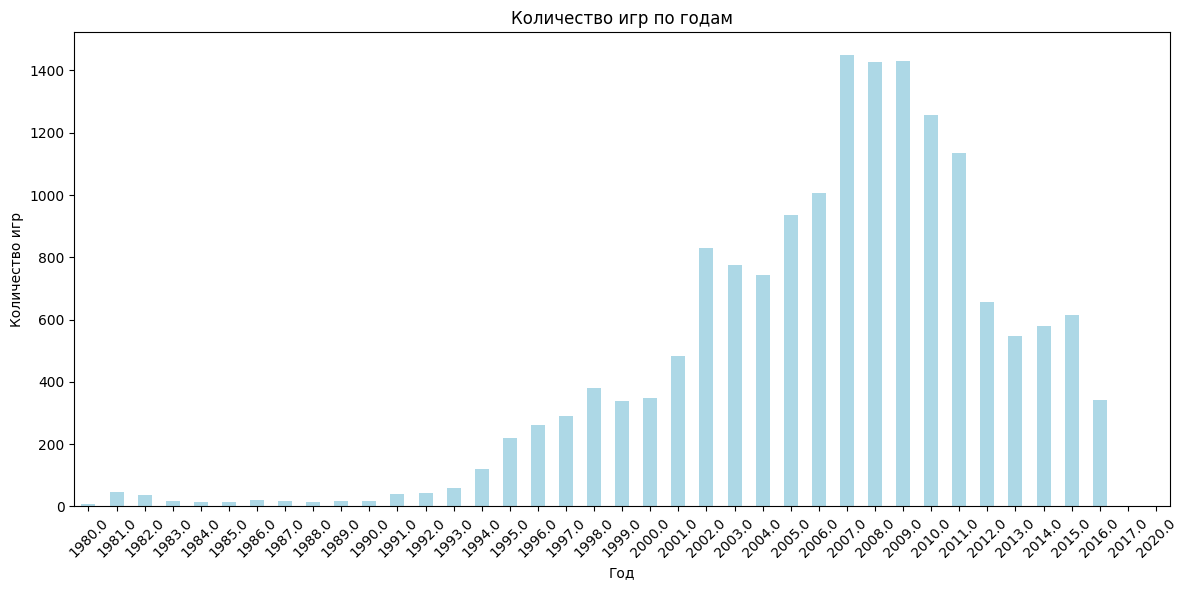

Самая удачная пятилетка для игростроя: 2005.0 - 2009.0


In [23]:
# Преобразование года в числовой формат
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Удаление строк с некорректными годами
df = df.dropna(subset=['Year'])

# Группировка данных по годам и подсчет количества игр для каждого года
games_by_year = df.groupby('Year').size()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
games_by_year.plot(kind='bar')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Нахождение пятилетки с наибольшим количеством игр
most_successful_period_start = games_by_year.idxmax() // 5 * 5
print("Самая удачная пятилетка для игростроя:", most_successful_period_start, "-", most_successful_period_start + 4)


Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

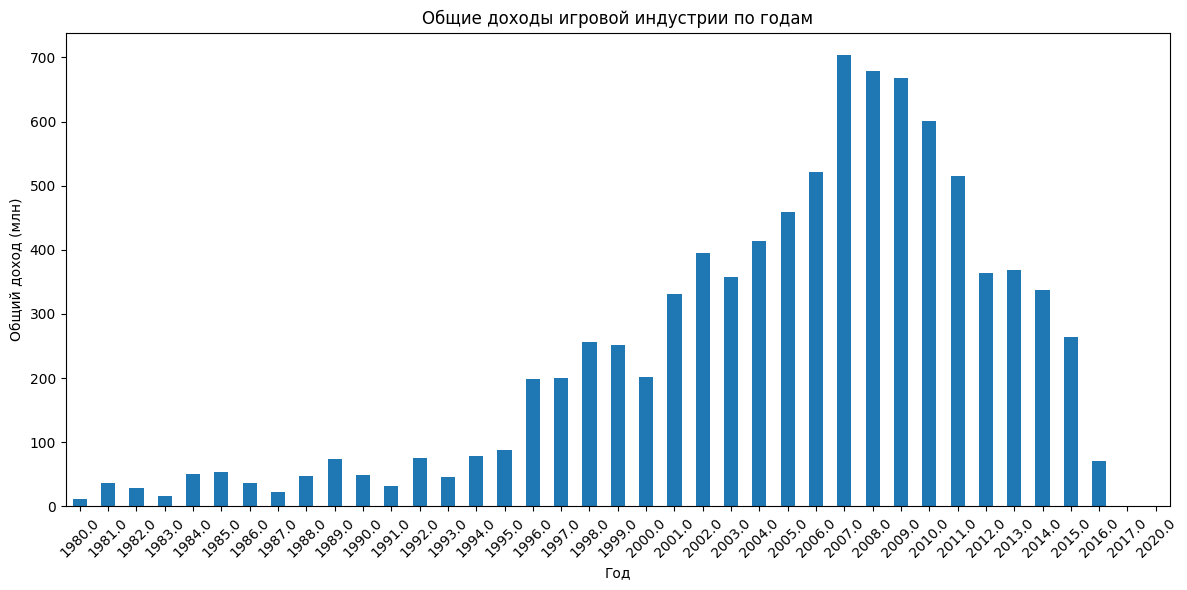

Самый прибыльный год: 2007.0
Прибыль: 703.51


In [30]:
# Группировка данных по годам и вычисление суммарных доходов для каждого года
sum_by_year = df.groupby('Year')['Global_Sales'].sum()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sum_by_year.plot(kind='bar')
plt.title('Общие доходы игровой индустрии по годам')
plt.xlabel('Год')
plt.ylabel('Общий доход (млн)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Нахождение года с самым высоким общим доходом
most_successful_year = sum_by_year.idxmax()
max_sum_by_year = sum_by_year.max()
print("Самый прибыльный год:", most_successful_year)
print("Прибыль:", max_sum_by_year)


Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

Пример:
![gr](img/gr.png)

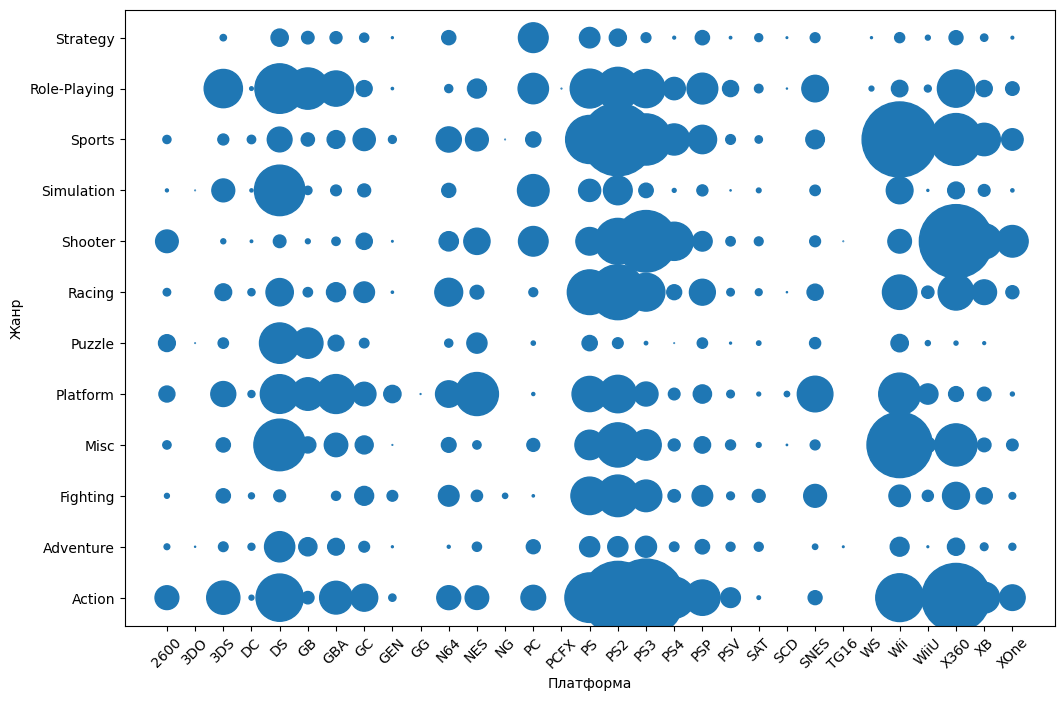

In [39]:
# Группировка по платформам и жанрам и суммирование продаж
group_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(group_sales['Platform'], group_sales['Genre'], s=group_sales['Global_Sales'] * 10)
plt.xlabel('Платформа')
plt.xticks(rotation=45)
plt.ylabel('Жанр')
plt.show()

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

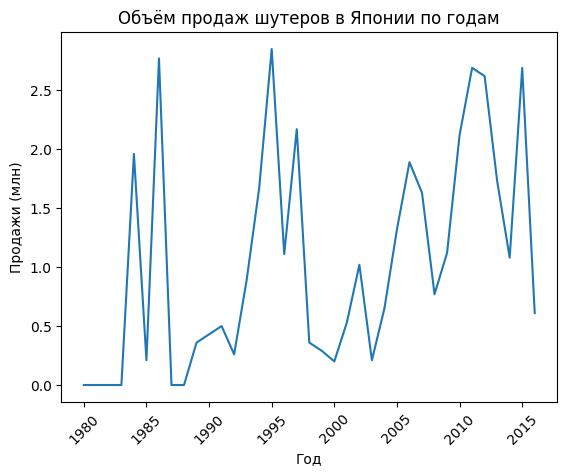

Самый прибыльный год для шутеров в Японии: 1995.0
Объём продаж: 2.85


In [42]:
# Отфильтровать по жанру "Shooter" и региону "JP_Sales"
japan_shooters = df[df['Genre'] == 'Shooter'][['Year', 'JP_Sales']].dropna()
sales_by_year = japan_shooters.groupby('Year')['JP_Sales'].sum()

plt.plot(sales_by_year.index, sales_by_year.values)
plt.title('Объём продаж шутеров в Японии по годам')
plt.xlabel('Год')
plt.xticks(rotation=45)
plt.ylabel('Продажи (млн)')
plt.show()

# Нахождение самого прибыльного года
most_profitable_year_shooter = sales_by_year.idxmax()
max_sales_shooter = sales_by_year.max()
print("Самый прибыльный год для шутеров в Японии:", most_profitable_year_shooter)
print("Объём продаж:", max_sales_shooter)


Ответ: <span style="color:red">#впишите сюда</span>

#### Какие игры являются самыми старыми?

In [46]:
min_year = df['Year'].min()

oldest_games = df[df['Year'] == min_year]

print('Самые старые игры')
print(oldest_games[['Name', 'Year']])


Самые старые игры
                 Name    Year
258         Asteroids  1980.0
544   Missile Command  1980.0
1766          Kaboom!  1980.0
1969         Defender  1980.0
2669           Boxing  1980.0
4025       Ice Hockey  1980.0
5366          Freeway  1980.0
6317           Bridge  1980.0
6896         Checkers  1980.0


Ответ: <span style="color:red">#впишите сюда</span>

#### Сколько шутеров было выпущено в 2003 году?

In [48]:
print("Выпущено шутеров в 2003 году:", len(df[(df['Year'] == 2003) & (df['Genre'] == 'Shooter')]))

Выпущено шутеров в 2003 году: 73


Ответ: <span style="color:red">#впишите сюда</span>